In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/projects/uWF101/"
fil =  "watertofood_uWF_allcrops_15countries_1960-2016.csv" 
fil2 =  "watertofood_WF_allcrops_15countries_1960-2016.csv" 
df = pd.read_csv(path+fil, ";",header=1)
df2 = pd.read_csv(path+fil2, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
df2 = df2.mask(df2==0)    # set zero values to nan-values

display(df.head(5))
display(df2.head(5))

,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Agave Fibres Nes,800,Non edible,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,11,AT,Almonds Shelled,231,Fruits,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,11,AT,"Almonds, with shell",221,Fruits,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,11,AT,"Anise, badian, fennel, corian.",711,Lux-foods,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,11,AT,Apples,515,Fruits,m3/ton,67.596703,67.490303,67.621696,...,155.539001,173.072998,176.309998,145.723999,160.794998,302.752991,177.143005,157.955994,132.710007,251.289993


,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Agave Fibres Nes,800,Non edible,m3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,11,AT,Almonds Shelled,231,Fruits,m3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,11,AT,"Almonds, with shell",221,Fruits,m3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,11,AT,"Anise, badian, fennel, corian.",711,Lux-foods,m3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,11,AT,Apples,515,Fruits,m3,30824100.0,29088300.0,29483100.0,...,74329296.0,95424800.0,85617696.0,39462700.0,48690200.0,79354000.0,41555000.0,49020000.0,38167200.0,25547900.0


In [7]:
df_weight = df.copy()
df_weight.iloc[:,7:] = df2.iloc[:,7:].div(df.iloc[:,7:]).round()
df_weight.head()

,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Agave Fibres Nes,800,Non edible,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,11,AT,Almonds Shelled,231,Fruits,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,11,AT,"Almonds, with shell",221,Fruits,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,11,AT,"Anise, badian, fennel, corian.",711,Lux-foods,m3/ton,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,11,AT,Apples,515,Fruits,m3/ton,456000.0,431000.0,436001.0,...,477882.0,551356.0,485609.0,270804.0,302809.0,262108.0,234584.0,310340.0,287599.0,101667.0


In [12]:
df_weight_p = pd.pivot_table(df_weight, values=df_weight.iloc[:,7:], 
                             index=None, columns=["Item Name","Country Name"])
df_weight_s = pd.DataFrame(df_weight_p.stack(level=0).stack(level=0))
df_weight_s.reset_index(level=[0,1,2],inplace=True)
df_weight_s.columns = ['Years', 'Item Name', 'Country Name', 'Weight_t']
df_weight_s["Years"]=df_weight_s["Years"].astype(int)
display(df_weight_s.shape)
display(df_weight_s.describe())
df_weight_s.head(5)

(53346, 4)

,Years,Weight_t
count,53346.000000,5.334600e+04
mean,1989.841675,6.282914e+05
std,16.325529,2.553123e+06
min,1961.000000,1.000000e+00
25%,1976.000000,5.663250e+03
50%,1991.000000,3.900000e+04
75%,2004.000000,2.291465e+05
max,2016.000000,5.192829e+07


,Years,Item Name,Country Name,Weight_t
0,1961,"Almonds, with shell",France,3680.0
1,1961,"Almonds, with shell",Greece,41146.0
2,1961,"Almonds, with shell",Hungary,1000.0
3,1961,"Almonds, with shell",Italy,328500.0
4,1961,"Almonds, with shell",Morocco,8000.0


In [22]:
# bring df in format useable with sns
dftest = pd.pivot_table(df, values=df.iloc[:,7:], index=None, columns=["Item Name","Country Name"])#.xs("1961")
dftest.index.name = "Years"
dfpl = pd.DataFrame(dftest.stack(level=0).stack(level=0))
dfpl.reset_index(level=[0,1,2],inplace=True)
dfpl.columns = ['Years', 'Item Name', 'Country Name', 'uWF']
dfpl["Years"]=dfpl["Years"].astype(int)
display(dfpl.shape)
dfpl.head(5)

(53346, 4)

,Years,Item Name,Country Name,uWF
0,1961,"Almonds, with shell",France,5325.129883
1,1961,"Almonds, with shell",Greece,5919.399902
2,1961,"Almonds, with shell",Hungary,5919.399902
3,1961,"Almonds, with shell",Italy,5919.399902
4,1961,"Almonds, with shell",Morocco,17585.699219


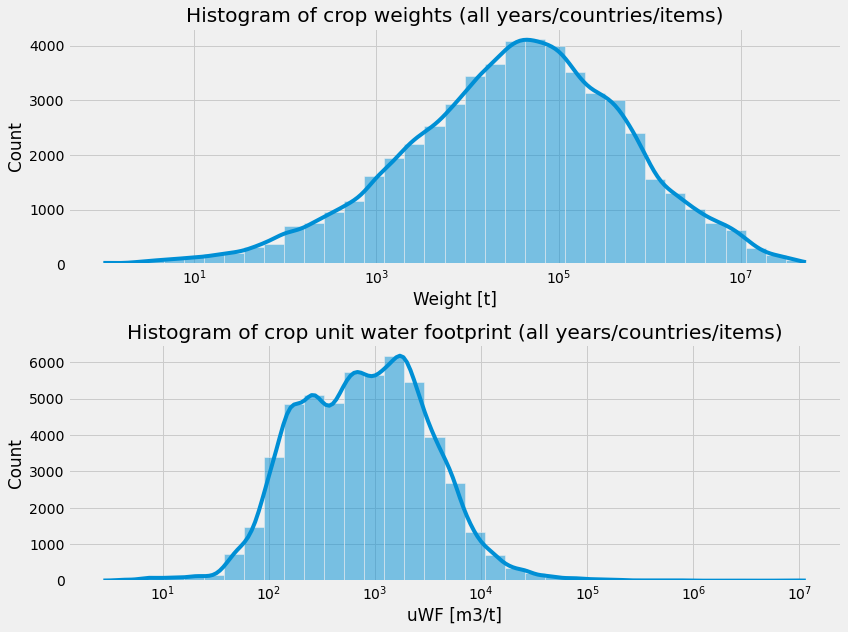

In [69]:
plt.style.use("fivethirtyeight")
fig,ax = plt.subplots(2,figsize=[12,9])
sns.histplot(df_weight_s["Weight_t"],bins=35,
             kde=True,log_scale=True,ax=ax[0]);
sns.histplot(dfpl["uWF"],bins=35,
             kde=True,log_scale=True,ax=ax[1]);
ax[0].set_title("Histogram of crop weights (all years/countries/items)")
ax[1].set_title("Histogram of crop unit water footprint (all years/countries/items)")
ax[0].set_xlabel("Weight [t]");
ax[1].set_xlabel("uWF [m3/t]");
plt.tight_layout()

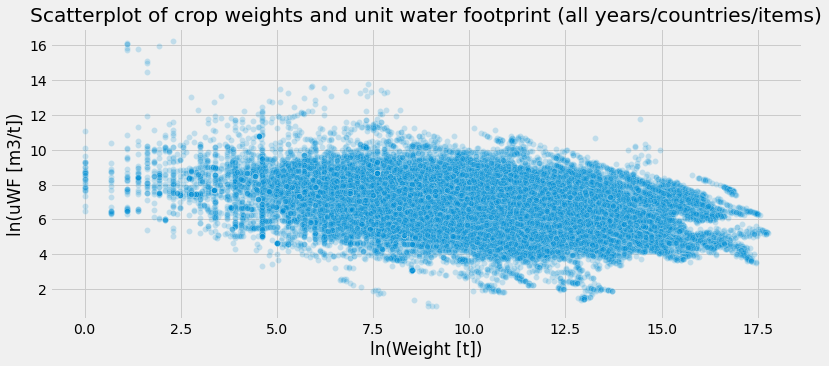

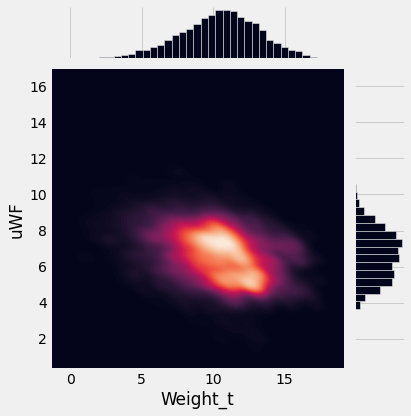

In [60]:
fig,ax = plt.subplots(figsize=[12,5])
sns.scatterplot(x=np.log(df_weight_s["Weight_t"]), 
                y=np.log(dfpl["uWF"]),alpha=.2,ax=ax);
ax.set(title="Scatterplot of crop weights and unit water footprint (all years/countries/items)",
      xlabel="ln(Weight [t])",ylabel="ln(uWF [m3/t])");

g = sns.JointGrid(x=np.log(df_weight_s["Weight_t"]), 
                y=np.log(dfpl["uWF"]))
g.plot_joint(sns.kdeplot, fill=True, 
             thresh=0, levels=100, cmap="rocket") #clip=((2200, 6800), (10, 25))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=35);


In [114]:
"""Check whether log-distributions are normally distributed"""
print("       ________mean vs. median________\n",
      np.log(df_weight_s["Weight_t"]).mean(),"vs.",np.log(df_weight_s["Weight_t"]).median(),
     "\n",np.log(dfpl["uWF"]).mean(),"vs.",np.log(dfpl["uWF"]).median())
# Yes --> normal distributions in log-log space --> we can use mean and std for outlier detection!

# Find limits for 3*sigma for outlier detection
print("\nLower limit of 3sigma (WF): ",
      np.exp(np.log(df_weight_s["Weight_t"]).mean() - 3*np.log(df_weight_s["Weight_t"]).std()).round(2),
      "t \n","Upper limit of 3sigma (uWF): ",
      np.exp(np.log(dfpl["uWF"]).mean() + 3*np.log(dfpl["uWF"]).std()).round(),"m3/t" )

print((dfpl.loc[:,"uWF"]>10232).sum(), dfpl.loc[:,"uWF"].shape)

       ________mean vs. median________
 10.402756277442414 vs. 10.571316925111784 
 6.661653805068202 vs. 6.678158454904692

Lower limit of 3sigma (WF):  7.19 t 
 Upper limit of 3sigma (uWF):  57232.0 m3/t
1649 (53346,)


In [113]:
display(dfpl.loc[df_weight_s.loc[:,"Weight_t"]<7.2,["uWF","Item Name","Country Name"]].sort_values(by="uWF").describe())

,uWF
count,2.350000e+02
mean,2.998442e+05
std,1.508105e+06
min,2.198240e+02
25%,1.923945e+03
50%,4.411310e+03
75%,8.268910e+03
max,1.044670e+07


In [ ]:
item_cats = list(df["Item Category"].unique())
print(item_cats)

item_cats_item_names = {}
for item_cat in item_cats:
    item_cats_item_names[item_cat] = list(df.loc[df.loc[:,"Item Category"] == item_cat,"Item Name"].unique())
    print(item_cat, "has", len(item_cats_item_names[item_cat]), "items \n")

print("\n\n\n\n")    
item_cats_item_names   

## Data cleaning --> set unrealistic values to NaN

In [ ]:
print(dfpl["uWF"].isna().sum())
dfpl.loc[dfpl["uWF"]>5000,"uWF"] = np.nan  #exclude values larger than 5k l/kg from plot
print(dfpl["uWF"].isna().sum())

In [ ]:
# dfpl.loc[:,"Years"] = dfpl.loc[:,"Years"].astype("int")
# dfpl.dtypes

## Start Plotting: Histogram-like panel plot

In [ ]:
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
pal = sns.color_palette("viridis", len(dfpl["Years"].unique()))


In [ ]:
#fig,ax = plt.subplots(5,3,figsize=[80,20])
g=sns.catplot(x="Country Name", y="uWF", hue="Years",
            col="Item Name", col_wrap=3, aspect=.9, sharey=False,
            kind="strip", data=dfpl, alpha = .7, palette=pal); #, palette=pal
# plt.clf()
# plt.colorbar(fig)
# ax.legend_.remove()
g.set_xticklabels(rotation=90);

In [ ]:
# norm = plt.Normalize(dfpl["Years"].min(), dfpl["Years"].max())
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# sm.set_array([])

g = sns.catplot(x="Item Name", y="uWF", hue="Years",
            col="Country Name", col_wrap=3, aspect=1.0, sharey=True,
            kind="strip", data=dfpl, palette=pal, alpha = .68); #palette=pal
#g.get_legend().remove()
#g.figure.colorbar(sm)
g.set_xticklabels(rotation=90);

In [ ]:
#dfpl["Years"] = dfpl["Years"].astype(int)
dfpl.dtypes

In [ ]:
# g = sns.FacetGrid(dfpl, col="Item Name", sharey=False, hue="Country Name",
#                   col_wrap=5, height=5, )
# g.map(sns.violinplot, "Country Name","uWF", order=dfpl["Country Name"])
# g.set(xticks=[0, 1000, 2000],xlim=[0,2000])
# g.add_legend();